###Processamento Digital de Sinais
####Atividade 02 - AB1
#####Aluno: Derek Nielsen Araújo Alves - 17212092

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def DFT(X):
  samples = len(X) #Numero de amostras
  n = np.arange(samples) #DFT
  k = n.reshape(samples, 1)
  exp = (-2j * np.pi * k * n)/samples
  e = np.exp(exp, dtype=complex)
  return np.dot(e, X)

In [ ]:
def plot(x, y, tlt, lblx, lbly, cut):
  if cut:
    x = x[0:len(x)//2]
    y = y[0:len(y)//2]
  plt.title(tlt)
  plt.xlabel(lblx)
  plt.ylabel(lbly)
  plt.plot(x, y)

#####1. Considere as amostras do sinal x[n] descritas no arquivo texto "xn.txt". Considerando que uma frequência de amostragem de 1000 Hz foi utilizada para gerar esta sequência, implemente o algoritmo FFT-Radix2 e analise o espectro frequencial deste sinal.


In [ ]:
#Implementação Radix2 atividade anterior
def Radix2(X):
    
    X = np.asarray(X, dtype=complex)
    M = X.shape[0]#Amostras
    Min = 4

    if M % 2 != 0:
        raise ValueError("O tamanho da entrada deve ser 2^n")

    if M <= Min:
        return DFT(X)
    else: #Recursão
        me = Radix2(X[::2]) #indice começa em 0 com passo 2
        mo = Radix2(X[1::2])#começa em 1 com passo 2
        exp = np.exp(-2j * np.pi * np.arange(M) / M)

        p1 = me + mo * exp[0:M//2]
        p2 = me + mo * exp[M//2:]

    return np.concatenate([p1, p2])

In [ ]:
import pandas as pd

data = pd.read_csv('xn.csv') #Ler arquivo como CSV, modifiquei o arquivo para o formato CSV para facilitar a leitura.
Xn = np.asarray(data.Xn.values, dtype=float) #Converter para numpy array
N = Xn.shape[0] # Tamanho do array

Fs = 1000.0 # Frequencia de Amostragem
T = 1/Fs # Período
X = np.linspace(0, N*T, N) # Tempo em segundos
Xf = [(Fs*i)/N for i in range(0, N)] # Frequências para plot fft

#####Plotando

Plotando sinal de entrada X[n] com tamanho: 2048


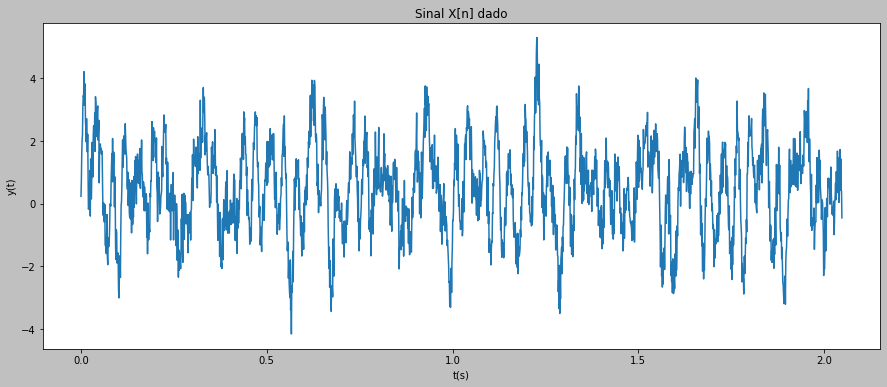

In [ ]:
print("Plotando sinal de entrada X[n] com tamanho:", len(Xn))
plt.figure(figsize=(15,6), facecolor="silver")
plot(X, Xn, "Sinal X[n] dado", "t(s)", "y(t)", False)
plt.show()
print()

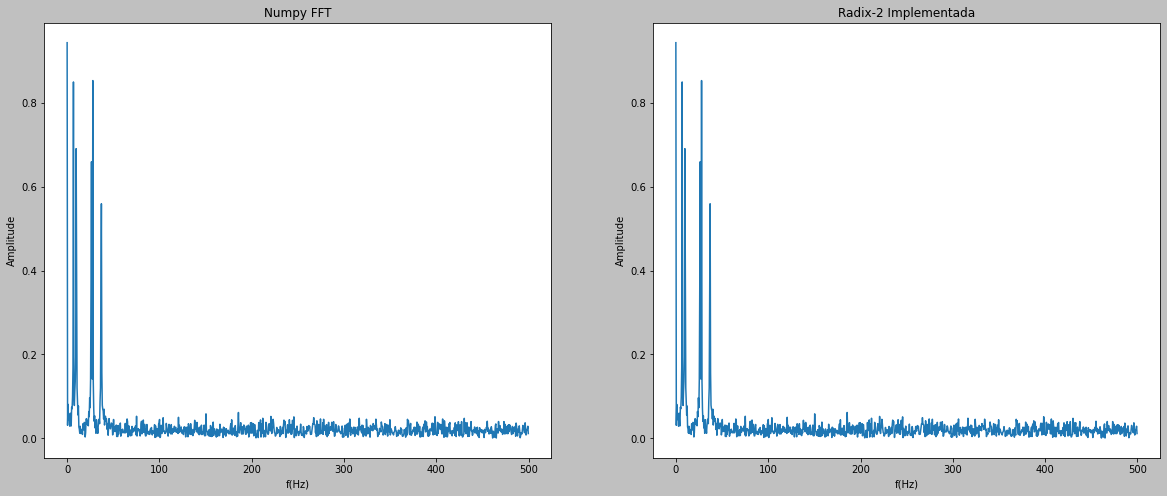

In [ ]:
Y = np.fft.fft(Xn)
plt.figure(figsize=(20,8), facecolor="silver")
plt.subplot(1, 2, 1)
plot(Xf, 2.0/len(Y)*abs(Y), 'Numpy FFT', 'f(Hz)', 'Amplitude', True)
plt.subplot(1, 2, 2)
Y = Radix2(Xn)
plot(Xf, 2.0/len(Y)*abs(Y), 'Radix-2 Implementada', 'f(Hz)', 'Amplitude', True)

Podemos ver que o sinal possui ruídos, e que, no espectro as frequências abaixo de 50hz tem uma maior presença no sinal de entrada.

#####2. Utilize um filtro ideal do tipo passa baixa e com frequência de corte ωc 18Hz paraeliminar componentes frequenciais indesejadas de x[n].

In [ ]:
def lowpassf(Y, Xf, f): #filtro passa baixa
  flag = True
  N = len(Y) #tamanho discretização
  for i in range((N//2)+1): # navega metade do espectro frequencial (OBS: +1 como discutido em sala)
    if(Xf[i] >= f): # se a frequencia na posição i do array for maior que uma frequencia desejada f, então:
      if flag: 
        print("Primeira frequência a ser filtrada: ", Xf[i])# Primeira frequência a ser filtrada
        print("Frequência filtrada na metade do gráfico + 1: ",Xf[N//2+1])#Frequência na metade do gráfico a ser filtrada
        print("Última frequência a ser filtrada: ",Xf[N-i])#Última frequência a ser filtrada
        flag = False
      Y[i] = 0 # A componente desta frequência é zerada
      Y[N-i] = 0 # Repete-se para a metade final do espectro, pois o gráfico é simétrico
  return Y

#####Plotando, como o gráfico é simétrico, apenas foi exibido a sua metade.

Primeira frequência a ser filtrada:  18.06640625
Frequência filtrada na metade do gráfico + 1:  500.48828125
Última frequência a ser filtrada:  981.93359375


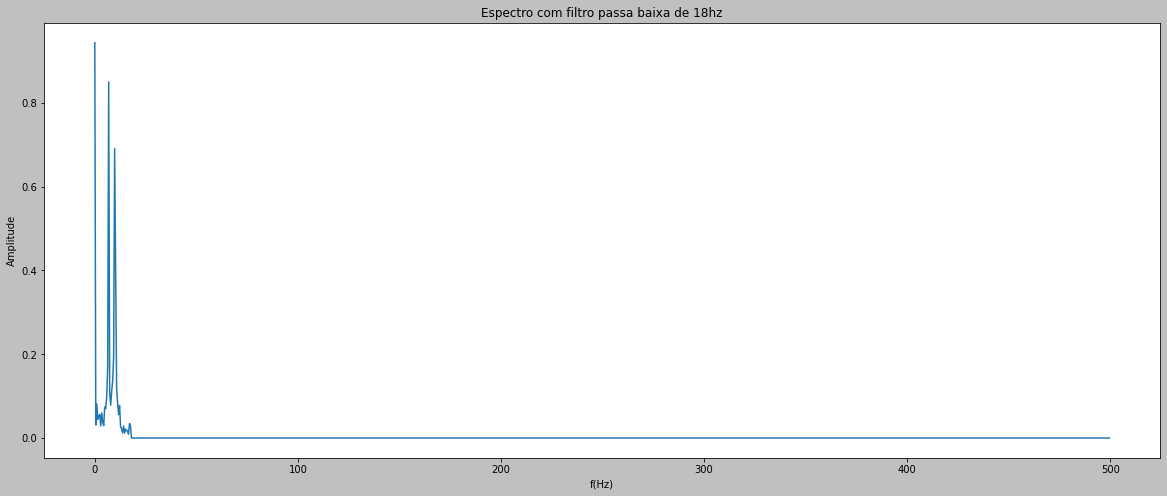

In [ ]:
Y = lowpassf(Y, Xf, 18)
plt.figure(figsize=(20,8), facecolor="silver")
plt.subplot()
plot(Xf, 2.0/len(Y)*abs(Y), 'Espectro com filtro passa baixa de 18hz', 'f(Hz)', 'Amplitude', True)

#####3. Implemente a IFFT para restaurar o sinal filtrado, xf [n], e compare com o sinal original.

In [ ]:
#implementando ifft_radix2
def I_Radix_2(X):
  samples = len(X)
  if samples == 1:#caso base
    return X
  elif samples % 2 == 0: #recursão
    xp = I_Radix_2(X[0::2]) #indice começa em 0 com passo 2
    xi = I_Radix_2(X[1::2]) #começa em 1 com passo 2

    x = np.zeros(samples, dtype=complex)

    for m in range(samples):
      ma = m % (samples//2)
      exp = (2j * np.pi * m/samples) #inversão sinal
      x[m] = xp[ma] + np.exp(exp)*xi[ma]
    return x
  else: 
    print("len(X) Não é 2^N")
    return -1

Plotando

Comparativo entre Numpy IFFT e IFFT_Radix2 Implementada



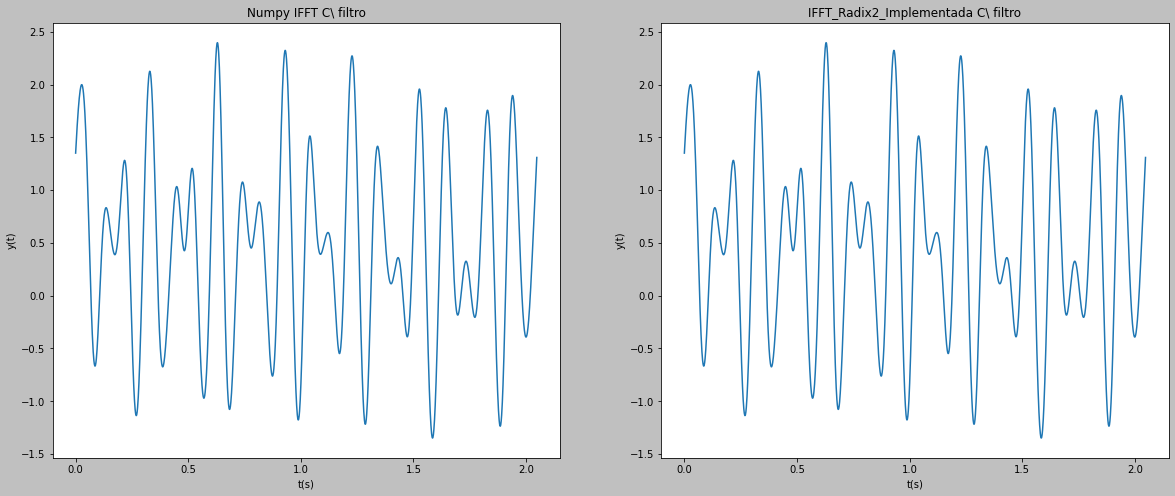

In [ ]:
print("Comparativo entre Numpy IFFT e IFFT_Radix2 Implementada")
plt.figure(figsize=(20,8), facecolor="silver")
plt.subplot(1, 2, 1)
XnI = np.fft.ifft(Y) # inversa com numpy
plot(X, XnI, "Numpy IFFT C\ filtro", "t(s)", "y(t)", False)
plt.subplot(1, 2, 2)
XnI = I_Radix_2(Y) #Calculando a inversa
XnI = XnI / N # Divisão fora do somatório
plot(X, XnI, "IFFT_Radix2_Implementada C\ filtro", "t(s)", "y(t)", False)

print()

Plotando sinal de entrada X[n] com tamanho: 2048


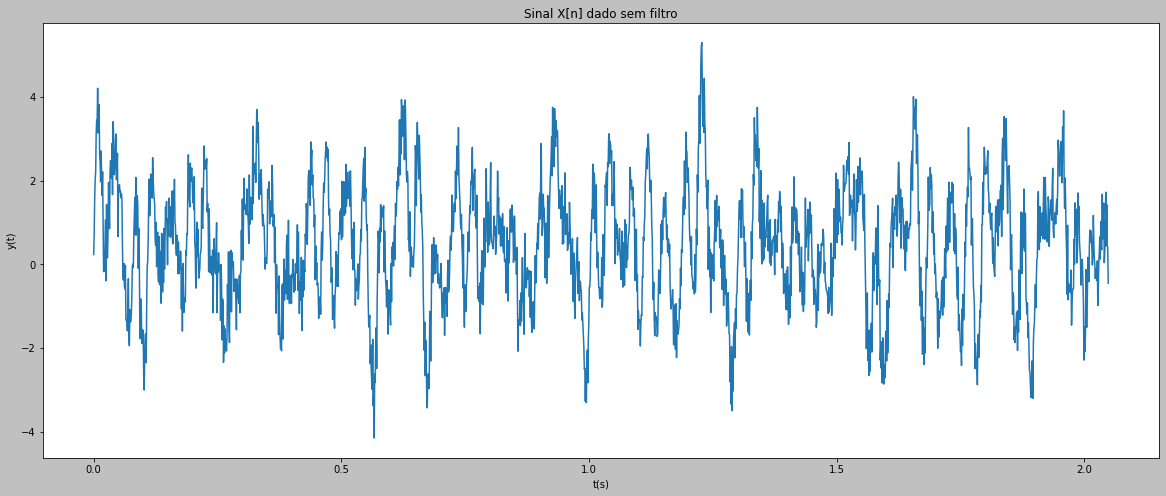

In [ ]:
print("Plotando sinal de entrada X[n] com tamanho:", len(Xn))
plt.figure(figsize=(20,8), facecolor="silver")
plot(X, Xn, "Sinal X[n] dado sem filtro", "t(s)", "y(t)", False)
plt.show()
print()